In [1]:
##Lesson 1-CNN


In [45]:
%matplotlib inline

In [1]:
path = "data/dogscats/sample/test2"

In [6]:
from __future__ import division,print_function
import os,json
from glob import glob
import numpy as np
np.set_printoptions(precision = 4, linewidth = 100)
from matplotlib import pyplot as plt

In [8]:
import utils
from importlib import reload
reload(utils)
from utils import plots

Using Theano backend.


AttributeError: module 'pygpu.gpuarray' has no attribute 'dtype_to_ctype'

In [ ]:
###Decrease the bacth size to decrease load on gpu
batch_size=12


In [5]:
import vgg16
from importlib import reload
reload(vgg16)
from vgg16 import Vgg16



Using Theano backend.


AttributeError: module 'pygpu.gpuarray' has no attribute 'dtype_to_ctype'

In [4]:
vgg=Vgg16()
batches=vgg.get_batches(path +'train',batch_size= 4)
imgs,labels=next(batches)
plots(imgs,titles=labels)
vgg.predict(imgs,True)

NameError: name 'Vgg16' is not defined

In [ ]:
vgg.classes[:4]

In [26]:
vgg=Vgg16()
batches=vgg.get_batches(path,batch_size=batch_size)
val_batches=vgg.get_batches(path,batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/1
160/160 [==============================] - 241s - loss: 1.1815 - acc: 0.6187 - val_loss: 0.2957 - val_acc: 0.9000


In [19]:
### Model Setup

In [104]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image 


In [105]:
###import mappings from vgg ids

In [124]:
FILES_PATH= 'http://files.fast.ai/models/';CLASS_FILE= 'imagenet_class_index.json'
fpath=get_file(CLASS_FILE, FILES_PATH+CLASS_FILE,cache_subdir='models')
with open(fpath) as f:class_dict=json.load(f)
classes=[class_dict[str(i)][1] for i in range(len(class_dict))]

In [125]:
classes[:5]

['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead']

In [126]:
def ConvBlock(layers, model, filters):
    for i in range(layers): 
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(filters, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

In [127]:
def FCBlock(model):
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

In [128]:
##data preprocessing

In [129]:
# Mean of each channel as provided by VGG researchers
vgg_mean = np.array([123.68, 116.779, 103.939]).reshape((3,1,1))

def vgg_preprocess(x):
    x = x - vgg_mean     # subtract mean
    return x[:, ::-1]    # reverse axis bgr->rgb

In [130]:
##vgg model architecture

In [131]:
def VGG_16():
    model = Sequential()
    model.add(Lambda(vgg_preprocess, input_shape=(3,224,224)))

    ConvBlock(2, model, 64)
    ConvBlock(2, model, 128)
    ConvBlock(3, model, 256)
    ConvBlock(3, model, 512)
    ConvBlock(3, model, 512)

    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)
    model.add(Dense(1000, activation='softmax'))
    return model

In [132]:
model = VGG_16()

In [133]:
fpath = get_file('vgg16.h5', FILES_PATH+'vgg16.h5', cache_subdir='models')
model.load_weights(fpath)

In [134]:
##imagenet predicitions

In [135]:
batch_size = 12

In [136]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, 
                batch_size=batch_size, class_mode='categorical'):
    return gen.flow_from_directory(path+dirname, target_size=(224,224), 
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

In [137]:
batches = get_batches('train', batch_size=batch_size)
val_batches = get_batches('valid', batch_size=batch_size)
imgs,labels = next(batches)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


ZeroDivisionError: integer division or modulo by zero

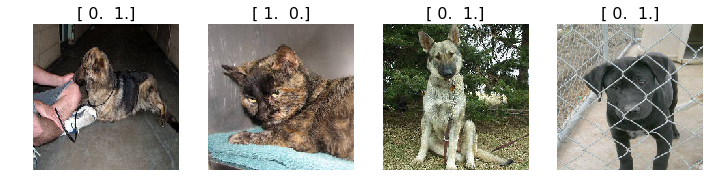

In [103]:
plots(imgs, titles=labels)

In [94]:
def pred_batch(imgs):
    preds = model.predict(imgs)
    idxs = np.argmax(preds, axis=1)

    print('Shape: {}'.format(preds.shape))
    print('First 5 classes: {}'.format(classes[:5]))
    print('First 5 probabilities: {}\n'.format(preds[0, :5]))
    print('Predictions prob/class: ')
    
    for i in range(len(idxs)):
        idx = idxs[i]
        print ('  {:.4f}/{}'.format(preds[i, idx], classes[idx]))

In [95]:
pred_batch(imgs)

Shape: (4, 1000)
First 5 classes: ['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead']
First 5 probabilities: [  1.3725e-06   4.8084e-09   8.1428e-07   6.7903e-07   5.7835e-06]

Predictions prob/class: 
  0.6021/wombat
  0.1495/tabby
  0.3555/koala
  0.4391/French_bulldog
